# Calculating Student-Faculty Ratio from 2013-2020 
using OIR data and WayBack Machine's archive of faculty roster

1. [Collect Fall Enrollment](#1)
2. [Collect Faculty Data](#2)
3. [Final Data](#3)

In [193]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

### 1. Collect fall enrollment by major from OIR website (in Firefox, download as Crosstab) <a id='1'></a>
<br>

In [194]:
st = pd.read_excel('Fall enrollment by major.xlsx', index_col = False)
st = st.replace(np.nan, 0, regex = True).astype(object)
st = st.applymap(lambda x: x.strip() if type(x)==str else x)
st = st.rename(columns = {'Unnamed: 0': 'Department'})

In [195]:
st = st.iloc[1:][:] #get rid of total row
st

,Department,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Undeclared,849.0,849.0,783.0,1134.0,1179.0,1197.0,1150.0,1119.0,1190.0,1197.0
2,Economics,236.0,240.0,238.0,170.0,187.0,186.0,190.0,187.0,184.0,164.0
3,Psychology,146.0,137.0,152.0,118.0,101.0,77.0,104.0,108.0,99.0,73.0
4,Political Science,116.0,113.0,132.0,115.0,80.0,78.0,110.0,120.0,101.0,77.0
5,Biological Sciences,89.0,89.0,85.0,73.0,93.0,94.0,96.0,87.0,75.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...
61,Clscl & Nr Eastern Archaeology,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,Latin,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,Data Science-Indiv Structured,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
64,East Asian Languages and Cultu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0


Organize Major Groups by Discipline

In [196]:
majorGroups = {'Humanities': ['3D Arts','Africana Studies', 'Africana Studies and Art','American Studies', 'American Art', 'American Literature', 'Art History', 'Art', 'Critical Thought', 'German', 'Asian Studies', 'Asian Studies and History', 'Cinema and Media Studies', 'Cinema & Media Studies','Chinese Language & Culture', 'Chinese Language and Literature', 'Chinese Language & Literature', 'Chinese', 'Chinese Studies', 'Christian Studies','History and Classical Studies','Classical Studies', 'Creative Writing', 'Classics', 'Classical Civilization', 'Clscl & Nr Eastern Archaeology', 'Comparative Literature', 'East Asian Languages and Cultures','East Asian Languages & Cultures', 'East Asian Studies', 'Engish', 'English and Creative Writing', 'English','French', 'French Cultural Studies', 'French and Linguistics', 'History and American Studies', 'History and Classical Studies','Non-Fiction Writing','German Language & Lit', 'German Studies','History', 'Italian Studies', 'Japanese Language & Culture', 'Japanese', 'Jewish Studies', 'Jewish Studies and History', 'Korean','Latin', 'Latin American Studies', 'Medieval/Renaissance Studies', 'Middle Eastern Studies', 'Music', 'Religion', 'Russian','Russian Area Studies', 'Recorder and Early Winds','Philosophy', 'Portuguese', 'Spanish', 'South Asian Studies', 'South Asia Studies', 'Slavic Studies','Women’s Studies',"Women's Studies", 'Women’s and Gender Studies', 'Percussion','Women’s & Gender Studies',"Women's and Gender Studies"],
 'Social Sciences': ['Anthropology', 'Cognitive&Linguistic Sciences', 'Cognitive Science', 'Cognitive and Linguistic Sciences','Cognitive and Linguistic Sciences Program','Economics', 'Education Studies', 'Education', 'International Relations','International Relations - Political Science', 'International Relations-Economics', 'International Relations-History', 'Peace and Justice Studies','Peace & Justice Studies','Political Science', 'Psychology', 'Sociology', 'Sociology and', 'Psychology and Cognitive and Linguistic Sciences'],
 'Other': ['Architecture', 'Environmental Studies',  'Individualized majors', 'Media Arts and Sciences', 'Studio Art', 'Theatre Studies', 'Undeclared', 'Physical Education, Recreation and Athletics', 'Physical Education, Recreation, and Athletics', 'Athletics'],
 'Sciences': ['Astronomy', 'Astrophysics', 'Chemical Physics','Biochemistry', 'Bioinformatics', 'Biological Sciences', 'Chemistry', 'Computer Science', 'Engineering', 'Engineering Studies', 'Data Science-Indiv Structured', 'Geosciences', 'Environmental Science', 'Mathematics', 'Math', 'Neuroscience', 'Physics', 'Quantitative Reasoning Program', 'Quantitate Reasoning'],
}

In [197]:
st = st.replace({'Art History/Studio': 'Art History', 'Art Studio': 'Studio Art', 'Biochemistry & Biological Chemistry': 'Biochemistry',
                 'East Asian Languages and Cultu': 'East Asian Languages and Cultures', "Women's Studies":"Women's and Gender Studies"})


In [198]:
def get_discipline(x):
    for key in majorGroups: 
        if x in majorGroups[key]: return key

In [199]:
st['Discipline'] = st['Department'].apply(get_discipline)
st

,Department,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Discipline
1,Undeclared,849.0,849.0,783.0,1134.0,1179.0,1197.0,1150.0,1119.0,1190.0,1197.0,Other
2,Economics,236.0,240.0,238.0,170.0,187.0,186.0,190.0,187.0,184.0,164.0,Social Sciences
3,Psychology,146.0,137.0,152.0,118.0,101.0,77.0,104.0,108.0,99.0,73.0,Social Sciences
4,Political Science,116.0,113.0,132.0,115.0,80.0,78.0,110.0,120.0,101.0,77.0,Social Sciences
5,Biological Sciences,89.0,89.0,85.0,73.0,93.0,94.0,96.0,87.0,75.0,59.0,Sciences
...,...,...,...,...,...,...,...,...,...,...,...,...
61,Clscl & Nr Eastern Archaeology,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Humanities
62,Latin,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Humanities
63,Data Science-Indiv Structured,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,Sciences
64,East Asian Languages and Cultures,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,Humanities


Now aggregate counts by discipline

In [200]:
st = st[st.Department != 'Undeclared']
aggregation_functions = {'2011': 'sum', '2012': 'sum', '2013':'sum','2014':'sum','2015': 'sum', '2016':'sum','2017':'sum','2018': 'sum', '2019':'sum','2020':'sum'}
st_d = st.groupby(st['Discipline']).aggregate(aggregation_functions)

In [201]:
st_d = st_d.T
st_d

Discipline,Humanities,Other,Sciences,Social Sciences
2011,655.0,127.0,365.0,691.0
2012,640.0,125.0,412.0,672.0
2013,647.0,141.0,435.0,704.0
2014,459.0,99.0,375.0,523.0
2015,414.0,102.0,406.0,489.0
2016,410.0,102.0,434.0,463.0
2017,434.0,119.0,460.0,533.0
2018,452.0,122.0,451.0,552.0
2019,403.0,117.0,433.0,534.0
2020,302.0,117.0,411.0,483.0


In [202]:
st_d = st_d.reset_index().rename(columns = {'index': 'year'})
st_d

Discipline,year,Humanities,Other,Sciences,Social Sciences
0,2011,655.0,127.0,365.0,691.0
1,2012,640.0,125.0,412.0,672.0
2,2013,647.0,141.0,435.0,704.0
3,2014,459.0,99.0,375.0,523.0
4,2015,414.0,102.0,406.0,489.0
5,2016,410.0,102.0,434.0,463.0
6,2017,434.0,119.0,460.0,533.0
7,2018,452.0,122.0,451.0,552.0
8,2019,403.0,117.0,433.0,534.0
9,2020,302.0,117.0,411.0,483.0


Convert into long format

In [203]:
st_m = pd.melt(st_d, id_vars = 'year',value_vars=['Humanities', 'Other', 'Sciences', 'Social Sciences'],
        var_name = 'Discipline', value_name = '# students')
st_m

,year,Discipline,# students
0,2011,Humanities,655.0
1,2012,Humanities,640.0
2,2013,Humanities,647.0
3,2014,Humanities,459.0
4,2015,Humanities,414.0
5,2016,Humanities,410.0
6,2017,Humanities,434.0
7,2018,Humanities,452.0
8,2019,Humanities,403.0
9,2020,Humanities,302.0


### 2. Collect Faculty Data<a id='2'></a>
<br>
In order to get the faculty data, want to scrape the wayback machine BUT html on the pages are 'stale'. To get around this, I downloaded the pages as html files and then scraped those. 
I formatted the file names as the name of the year

In [204]:
urls = ['file:///C:/Users/abguh/Desktop/wdc/faculty%20pages/20{}.html'.format(i) for i in range(14,22)]
#note: 2013 not included as is handled separately

In [205]:
#given a professor entry, format to just department
def formatDept(prof): 
    if 'Fellow' in prof and 'Freedom Project': return prof[prof.find('Fellow')+10:]
    if ' of ' in prof: prof = prof.split(' of ')[1]
    elif ' in ' in prof: prof = prof.split(' in ')[1]
    if ' Horn' in prof or 'Organ' in prof or 'Keyboard' in prof or 'Coach' in prof or 'Guitar' in prof or 'Trombone' in prof or 'Voice' in prof or 'Conductor' in prof or 'Oboe' in prof or 'Bass' in prof or 'Piano' in prof or 'Jazz' in prof or 'Viola' in prof or 'Bassoon' in prof: return 'Music'
    elif 'Librarian' not in prof: return prof

#given a list of raw professor entries, make and return a list of just the departments
def make_list(raw):
    faculty = []
    for prof in raw:
        prof = prof.text.split('\n')[1]
        faculty.append(formatDept(prof))
    return faculty

In [206]:
#given a URL for an html file, open the file and then return a datafram with that list of departments
def get_professors(url):
    driver.get(url)
    raw = driver.execute_script("return document.getElementsByTagName('em')")
    return pd.DataFrame([formatDept(prof.text) for prof in raw])
    

In [207]:
#2013 was the only year with different html code, thus just did it separately for simplicity
def get_2013():
    driver.get('file:///C:/Users/abguh/Desktop/wdc/faculty%20pages/2013.html')
    raw = driver.execute_script("return document.getElementsByTagName('p')")[1:-9]
    return make_list(raw)

Now with all the helper functions, scrape all the data and put it into one large dataframe by concatenating each year's dataframe into one larger professor dataset. 

In [208]:
options = Options()
options.page_load_strategy = 'eager'
DRIVER_PATH = '/Users/abguh/Desktop/wdc/chromedriver'
driver = webdriver.Chrome(executable_path=DRIVER_PATH, options=options)

df_f = pd.DataFrame(get_2013())
for url in urls:
    df_f = pd.concat([df_f.reset_index(drop=True), get_professors(url).reset_index(drop=True)], axis = 1)
driver.close()
copy = df_f

In [209]:
df_f

,0,0,0,0,0,0,0,0,0
0,Middle Eastern Studies,Middle Eastern Studies,Middle Eastern Studies,Middle Eastern Studies,Middle Eastern Studies,"July 1, 2017","July 1, 2018","July 1, 2019","July 1, 2020"
1,Psychology,Economics,Economics,Economics,Economics,Middle Eastern Studies,Middle Eastern Studies,Middle Eastern Studies,Middle Eastern Studies
2,Middle Eastern Studies,Music,Music,Music,"Physical Education, Recreation and Athletics",Economics,Economics,Economics,Economics
3,Music,Latin American Studies,Spanish,Spanish,Music,Music,Music,Music,Music
4,Latin American Studies,Spanish,Music,Music,Spanish,"Physical Education, Recreation and Athletics",Spanish,Physics,Spanish
...,...,...,...,...,...,...,...,...,...
629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Art,NaN
630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,NaN
631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Economics,NaN
632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Theatre Studies and Japanese,NaN


Now rename the columns to years, fix up Nan and leading spaces

In [210]:
df_f.columns = ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
df_f = df_f.replace(np.nan, '', regex = True).replace('  ', ' ', regex = True).replace('’', "'").astype(str)
df_f = df_f.applymap(lambda x: x.strip() if type(x)==str else x)

In [211]:
def fix_up(x):
    if '\n' in x: x = x.split('\n')[0]
    if 'July' in x: return ''
    elif 'Professor' in x or 'Lecturer' in x or 'Laboratory' in x or 'Director' in x: return ''
    elif 'Quantitative' in x: return 'Quantitative Reasoning Program'
    elif 'Health' in x: return ''
    elif 'Theatre' in x: return 'Theatre Studies'
    elif 'Freedom Project' in x: return 'Political Science'
    elif 'Drum' in x or 'Violin' in x or 'Cello' in x or 'Saxophone' in x or 'Flute' in x or 'Harp' in x or 'Trumpet' in x: return 'Music'
    else: return x
df_f = df_f.replace({'the College and Clerk': '', 'the History': 'History', 'the Humanities': 'English', 
                     'the Physical and Natural Sciences':'Physics', 'the Practice':'Athletics', 'the Quantitative Reasoning Program': 'Math',
                     'the Social Sciences': 'Political Science', 'the Writing Program': 'English'}, value = None)

In [212]:
for col in df_f.columns:
    df_f[col] = df_f[col].apply(fix_up)
    df_f[col] = df_f[col].apply(get_discipline)


In [213]:
df_f = df_f.replace(np.nan, '', regex = True)
df_f

,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Humanities,Humanities,Humanities,Humanities,Humanities,,,,
1,Social Sciences,Social Sciences,Social Sciences,Social Sciences,Social Sciences,Humanities,Humanities,Humanities,Humanities
2,Humanities,Humanities,Humanities,Humanities,Other,Social Sciences,Social Sciences,Social Sciences,Social Sciences
3,Humanities,Humanities,Humanities,Humanities,Humanities,Humanities,Humanities,Humanities,Humanities
4,Humanities,Humanities,Humanities,Humanities,Humanities,Other,Humanities,Sciences,Humanities
...,...,...,...,...,...,...,...,...,...
629,,,,,,,,Humanities,
630,,,,,,,,Humanities,
631,,,,,,,,Social Sciences,
632,,,,,,,,Other,


The data that we want is the COUNT of how many professors are in each department, thus use value_counts()

In [214]:
dfList = []
for col in df_f.columns:
    x = df_f[col].value_counts()
    row = [col, x[0], x[1], x[2], x[3]]
    dfList.append(row)
df_c = pd.DataFrame(dfList, columns = ['year', 'Humanities', 'Sciences', 'Social Sciences', 'Other'])

In [215]:
df_c

,year,Humanities,Sciences,Social Sciences,Other
0,2013,250,150,94,88
1,2014,282,106,96,89
2,2015,256,126,100,95
3,2016,255,124,107,93
4,2017,237,138,107,90
5,2018,259,114,102,94
6,2019,264,119,99,90
7,2020,270,123,98,86
8,2021,248,117,110,99


And make it into long format to merge with the student dataset, and then calculate ratio

In [216]:
df_c = pd.melt(df_c, id_vars = 'year',value_vars=['Humanities', 'Other', 'Sciences', 'Social Sciences'],
        var_name = 'Discipline', value_name = '# prof')

### 3. Final Data<a id='3'></a>
<br>

In [217]:
df_final = pd.merge(st_m, df_c, on = ['year', 'Discipline'], how = 'left')

In [218]:
df_final = df_final[df_final.year != '2011']
df_final = df_final[df_final.year != '2012']
df_final['ratio'] = round(df_final['# students'] / df_final['# prof'])

In [219]:
df_final

,year,Discipline,# students,# prof,ratio
2,2013,Humanities,647.0,250.0,3.0
3,2014,Humanities,459.0,282.0,2.0
4,2015,Humanities,414.0,256.0,2.0
5,2016,Humanities,410.0,255.0,2.0
6,2017,Humanities,434.0,237.0,2.0
7,2018,Humanities,452.0,259.0,2.0
8,2019,Humanities,403.0,264.0,2.0
9,2020,Humanities,302.0,270.0,1.0
12,2013,Other,141.0,88.0,2.0
13,2014,Other,99.0,89.0,1.0


Text(0.5, 1.0, 'Student to Faculty Ratio by Year')

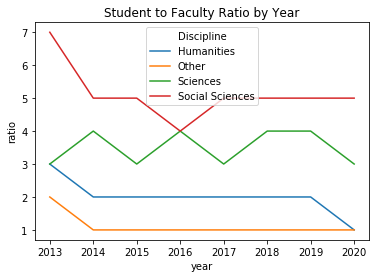

In [220]:
plt = sns.lineplot(x="year", y="ratio", hue="Discipline", data=df_final)
plt.set_title('Student to Faculty Ratio by Year')

In [221]:
plt = plt.figure.savefig('stu_fac_ratio.png', 
           transparent=True)